# Neighborhood operations

Neighborhood operations operate on not just a single pixel but on a neighborhood of pixels instead. Generally these neighborhoods are rectangles around a centroid pixel. Thus, edge lengths of these neighborhood regions must be an odd integer.



## Smoothing filters (low pass)
Here are some simple smoothing filters that are neighborhood operations:


*   **min:** set pixel value of the central pixel to the minimum pixel value in the neighborhood.
*   **max:** set pixel value of the central pixel to the maximum pixel value in the neighborhood.
*   **median:** set pixel value of the central pixel to the midpoint value of an sorted array of all pixel values of the neighborhood.
*   **mean:** set pixel value of the central pixel to the average of all pixel values in the neighbourhood.

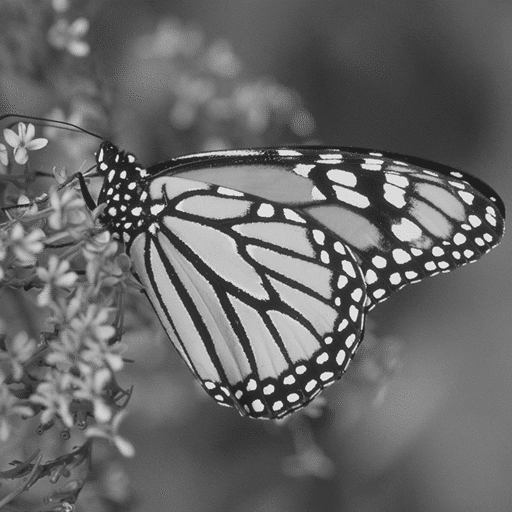

In [6]:
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow

img = cv.imread("./butterfly.bmp", cv.IMREAD_GRAYSCALE)
assert (img is not None), "An error occured while reading the image!"

cv2_imshow(img)

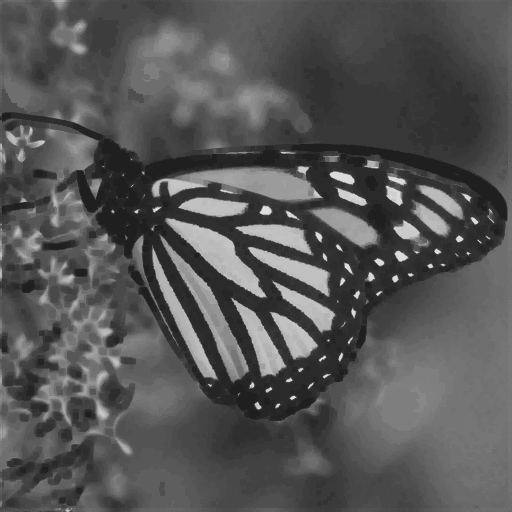

In [46]:
def MinFilter(img, nbhd_size):
  assert (nbhd_size % 2 != 0), "The neighbourhood size must not be even"
  assert (img is not None), "The image is not loaded"

  width, height = img.shape
  padded_width = (width//nbhd_size) * nbhd_size
  padded_height = (height//nbhd_size) * nbhd_size
  new_img = img.copy()

  assert (new_img is not None), "Memory not enough to allocate storage for new image"

  for i in range(((nbhd_size-1)//2), padded_width-((nbhd_size-1)//2)):
    for j in range(((nbhd_size-1)//2), padded_height-((nbhd_size-1)//2)):
      min = 255
      
      for k in range(i-((nbhd_size-1)//2), i+((nbhd_size-1)//2)+1):
        for w in range(j-((nbhd_size-1)//2), j+((nbhd_size-1)//2)+1):
          if img[k][w] < min:
            min = img[k][w]

      new_img[i][j] = min
  
  return new_img

cv2_imshow(MinFilter(img, 3))

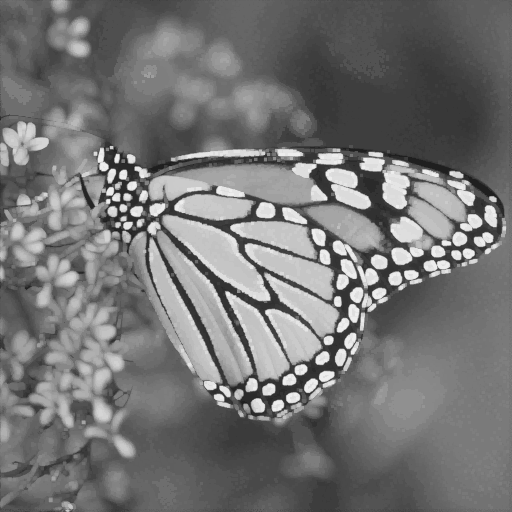

In [50]:
def MaxFilter(img, nbhd_size):
  assert (nbhd_size % 2 != 0), "The neighbourhood size must not be even"
  assert (img is not None), "The image is not loaded"

  width, height = img.shape
  padded_width = (width//nbhd_size) * nbhd_size
  padded_height = (height//nbhd_size) * nbhd_size
  new_img = img.copy()

  assert (new_img is not None), "Memory not enough to allocate storage for new image"

  for i in range(((nbhd_size-1)//2), padded_width-((nbhd_size-1)//2)):
    for j in range(((nbhd_size-1)//2), padded_height-((nbhd_size-1)//2)):
      max = 0
      
      for k in range(i-((nbhd_size-1)//2), i+((nbhd_size-1)//2)+1):
        for w in range(j-((nbhd_size-1)//2), j+((nbhd_size-1)//2)+1):
          if img[k][w] > max:
            max = img[k][w]

      new_img[i][j] = max
  
  return new_img

cv2_imshow(MaxFilter(img, 3))

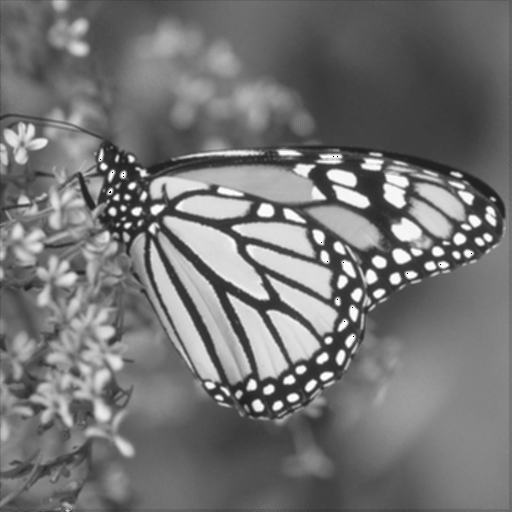

In [51]:
def MeanFilter(img, nbhd_size):
  assert (nbhd_size % 2 != 0), "The neighbourhood size must not be even"
  assert (img is not None), "The image is not loaded"

  width, height = img.shape
  padded_width = (width//nbhd_size) * nbhd_size
  padded_height = (height//nbhd_size) * nbhd_size
  new_img = img.copy()

  assert (new_img is not None), "Memory not enough to allocate storage for new image"

  for i in range(((nbhd_size-1)//2), padded_width-((nbhd_size-1)//2)):
    for j in range(((nbhd_size-1)//2), padded_height-((nbhd_size-1)//2)):
      sum = 0
      
      for k in range(i-((nbhd_size-1)//2), i+((nbhd_size-1)//2)+1):
        for w in range(j-((nbhd_size-1)//2), j+((nbhd_size-1)//2)+1):
            sum += img[k][w]

      new_img[i][j] = sum/(nbhd_size**2 - 1)
  
  return new_img

cv2_imshow(MeanFilter(img, 3))

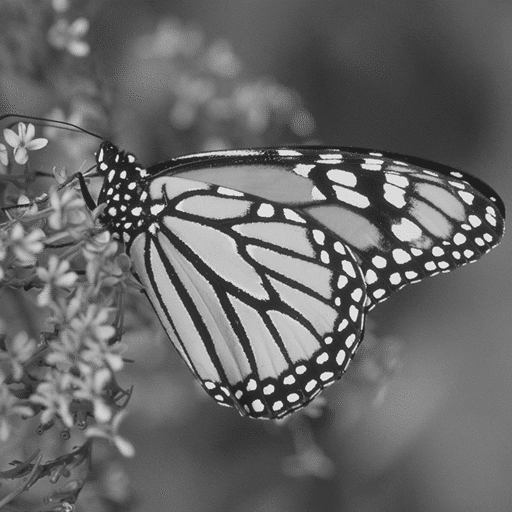

In [52]:
def MedianFilter(img, nbhd_size):
  assert (nbhd_size % 2 != 0), "The neighbourhood size must not be even"
  assert (img is not None), "The image is not loaded"

  width, height = img.shape
  padded_width = (width//nbhd_size) * nbhd_size
  padded_height = (height//nbhd_size) * nbhd_size
  new_img = img.copy()

  assert (new_img is not None), "Memory not enough to allocate storage for new image"

  for i in range(((nbhd_size-1)//2), padded_width-((nbhd_size-1)//2)):
    for j in range(((nbhd_size-1)//2), padded_height-((nbhd_size-1)//2)):
      vals = []
      
      for k in range(i-((nbhd_size-1)//2), i+((nbhd_size-1)//2)+1):
        for w in range(j-((nbhd_size-1)//2), j+((nbhd_size-1)//2)+1):
            vals.append(img[k][w])

      new_img[i][j] = vals[len(vals)//2]
  
  return new_img

cv2_imshow(MedianFilter(img, 3))

## Sharpening filters (high pass)

Sharpening spatial filters aims to highlight fine detail & edges and remove blurring from the images. 

It is based on spatial differentiation. Differentiation in this context is formulated differently from usual, it is the difference between subsequent values of a function.

$$
\frac{df}{dx}=f(x+1)-f(x) \\
\frac{d^2f}{d^2x}=[f(x+1)-f(x)]-[f(x)-f(x-1)]=f(x+1)-f(x-1)-2f(x)
$$

We will be representing the pixel values at a point $(x, y)$ with a function $f(x,y)$ and use spatially differention with this function. The second derivative is more useful than the first one in this case, since it will give stronger response to fine detail. 

### Laplacian and Sobel operator 

One of the most used sharpening filters is Laplacian. The laplacian is formulated as:
$$
\nabla^2f=\frac{\partial^2f}{\partial^2x} + \frac{\partial^2f}{\partial^2y}
$$
When $f$ is spatially partially differentiated for $x$ and $y$:

$$
\frac{\partial^2f}{\partial^2x}=f(x+1, y)-f(x-1, y)-2f(x, y) \\
\frac{\partial^2f}{\partial^2y}=f(x, y+1)-f(x, y-1)-2f(x, y)
$$

Substituting these to the Laplacian will yield:

$$
\nabla^2f=[f(x+1, y) + f(x-1, y) + f(x, y+1) + f(x, y-1)] - 4f(x,y)
$$

This can be converted into a mask as below:

$$ 
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\ 
0 & 1 & 0
\end{bmatrix}
$$

The Laplacian-filtered image is subtracted from the original image to achieve the enhanced result.

$$
g(x,y) = f(x,y) - \nabla^2f
$$

There are many variants of Laplacian filters. For example:
$$
\text{Variant}=\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\ 
1 & 1 & 1
\end{bmatrix}
$$

and here are the masks of the Sobel variants: $$
\text{SobelX}=\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\ 
1 & 2 & 1\end{bmatrix}\quad
\text{SobelY}=
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\ 
-1 & 0 & 1
\end{bmatrix}
$$

In [ ]:
def clamp_pixel_value(value):
  if value < 0:
    return 0
  elif value > 255:
    return 255
  else:
    return value


def LaplacianFilter(img, mask=None):
  assert (img is not None), "The image is not loaded"

  width, height = img.shape
  padded_width = (width//3) * 3
  padded_height = (height//3) * 3
  new_img = img.copy()

  assert (new_img is not None), "Memory not enough to allocate storage for new image"

  laplacian_mask = None

  if mask == "variant":
    laplacian_mask = [[1, 1, 1], [1, -8, 1], [1, 1, 1]]
  elif mask == "sobelx":
    laplacian_mask = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
  elif mask == "sobely":
    laplacian_mask = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
  else:
    laplacian_mask = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

  for i in range(1, padded_width-1):
    for j in range(1, padded_height-1):
      sum = 0

      for k in range(i-1, i+2):
        for w in range(j-1, j+2):
            sum += img[k][w] * laplacian_mask[k-i][w-j] 

      new_img[i][j] = clamp_pixel_value(sum)
  
  return new_img

def LaplacianEnhance(img, filter):
    assert (img is not None), "The image is not loaded"
    assert (filter is not None), "The filter is not loaded"

    img_width, img_height = img.shape
    filter_width, filter_height = filter.shape

    assert (img_width == filter_width and img_height == filter_height,
            "Image and filter sizes are not matching")
    
    new_img = img.copy()
    
    for i in range(img_width):
      for j in range(img_height):
        new_img[i][j] = img[i][j] - filter[i][j]

    return new_img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in ubyte_scalars


None:


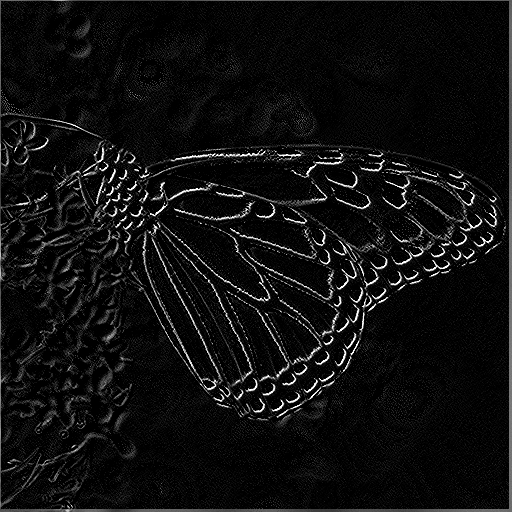

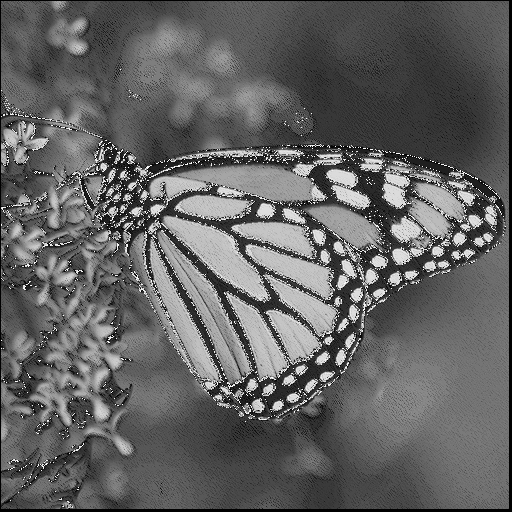

variant:


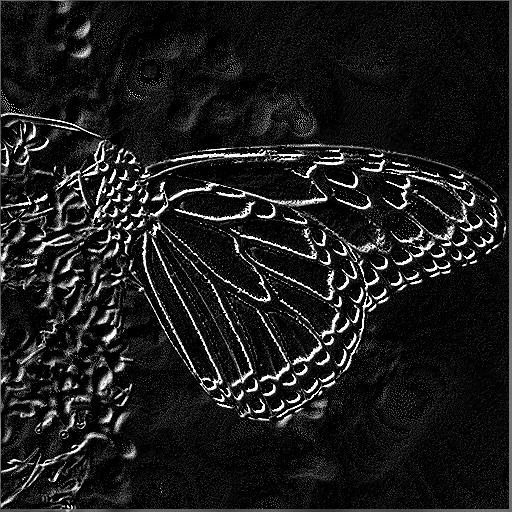

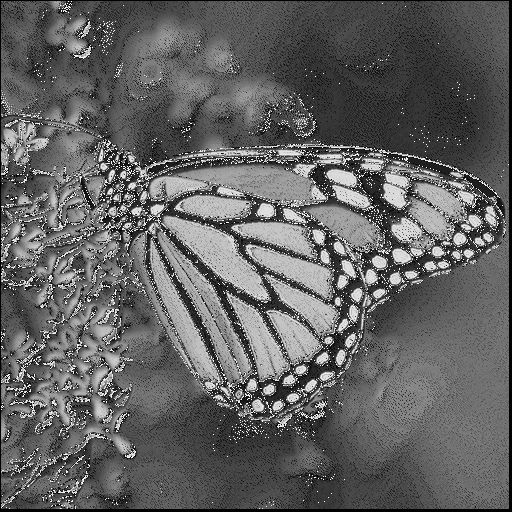

sobelx:


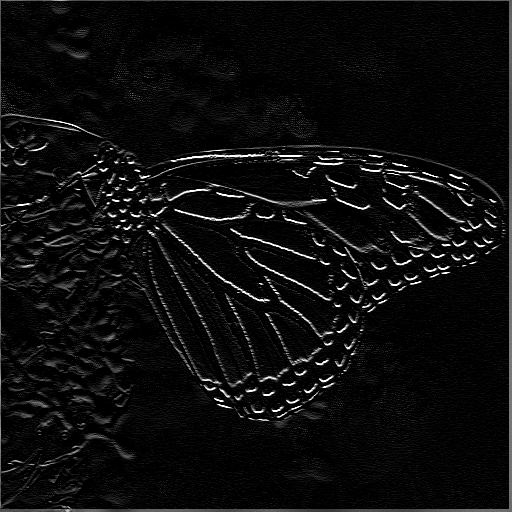

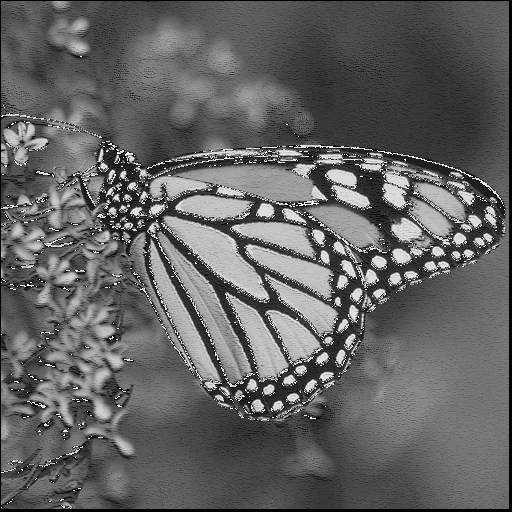

sobely:


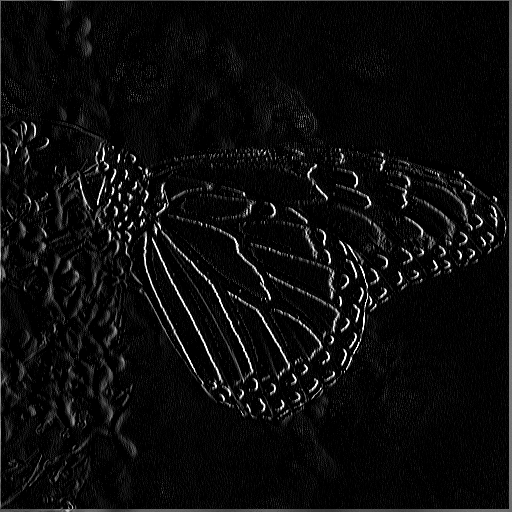

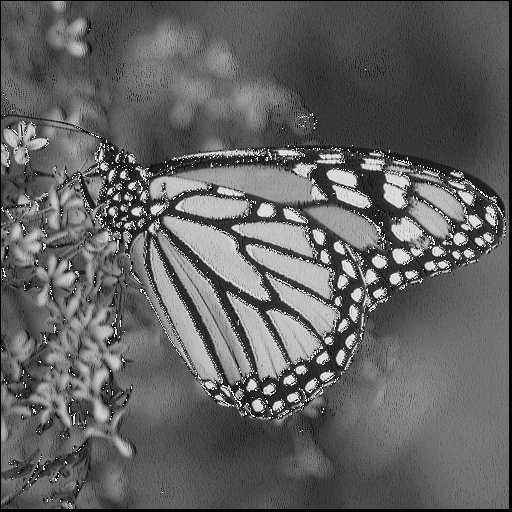

In [72]:
modes = [None, "variant", "sobelx", "sobely"]
masks = [LaplacianFilter(img, mode) for mode in modes]
sharpened_images = [LaplacianEnhance(img, mask) for mask in masks]

for i in range(4):
  print(str(modes[i]) + ":")
  cv2_imshow(masks[i])
  cv2_imshow(sharpened_images[i])